In [6]:
!pip install numpy
!pip install d2l --no-deps

In [7]:
from google.colab import files

# This will open a 'Choose Files' button in your output cell
# Choose train_helpers.py
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_helpers.py to train_helpers (1).py
User uploaded file "train_helpers (1).py" with length 2312 bytes


In [8]:
import time
import torch
from torch import nn
from d2l import torch as d2l
from train_helpers import train_and_eval

In [9]:
accuracies = {}
training_times = {}
parameter_count = {}

In [10]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [11]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))

In [12]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


NameError: name 'accuracies' is not defined

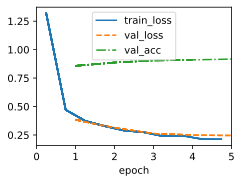

In [13]:
train_and_eval(VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))), "VGG-11", resize=True, epochs=5)

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
train_and_eval(AlexNet(), "AlexNet", resize=True, epochs=5)

In [ ]:
print("Comparison of VGG and AlexNet Performance")
print(f"VGG")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"AlexNet")
print(f"Accuracy: {accuracies['AlexNet']}")
print(f"Training Time: {training_times['AlexNet']}")
print(f"Parameter Count: {parameter_count['AlexNet']}")

In [ ]:
train_and_eval(VGG(arch=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))), "VGG-16", resize=True, epochs=5)

In [ ]:
train_and_eval(VGG(arch=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))), "VGG-19", resize=True, epochs=5)

In [ ]:
print("Summary of VGG Model Performance with Different Architectures")
print(f"VGG-11")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"VGG-16")
print(f"Accuracy: {accuracies['VGG-16']}")
print(f"Training Time: {training_times['VGG-16']}")
print(f"Parameter Count: {parameter_count['VGG-16']}")
print(f"VGG-19")
print(f"Accuracy: {accuracies['VGG-19']}")
print(f"Training Time: {training_times['VGG-19']}")
print(f"Parameter Count: {parameter_count['VGG-19']}")

In [ ]:
train_and_eval(VGG(arch=((2, 16), (2, 32), (4, 64), (4, 128), (4, 128))), "VGG-19-small", epochs=5)

In [ ]:
print("Comparison of VGG-19 and VGG-19-small")
print(f"VGG-19")
print(f"Accuracy: {accuracies['VGG-19']}")
print(f"Training Time: {training_times['VGG-19']}")
print(f"Parameter Count: {parameter_count['VGG-19']}")
print(f"VGG-19-small")
print(f"Accuracy: {accuracies['VGG-19-small']}")
print(f"Training Time: {training_times['VGG-19-small']}")
print(f"Parameter Count: {parameter_count['VGG-19-small']}")

## Nin

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

In [ ]:
train_and_eval(NiN(), "NiN", resize=True, epochs=10)

In [ ]:
class NiN_MLP_end(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.Flatten(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(num_classes))

In [ ]:
train_and_eval(NiN_MLP_end(), "NiN-MLP-end", resize=True, epochs=5)

In [ ]:
print("Comparison of NiN and NiN with MLP at the end")
print(f"NiN")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN with MLP at the end")
print(f"Accuracy: {accuracies['NiN-MLP-end']}")
print(f"Training Time: {training_times['NiN-MLP-end']}")
print(f"Parameter Count: {parameter_count['NiN-MLP-end']}")

## NiN Block Changes

In [ ]:
def nin_block_varheight(out_channels, kernel_size, strides, padding, 1x1height=2):
    1x1convs = []
    for _ in range(1x1height):
        1x1convs.append(nn.LazyConv2d(out_channels, kernel_size=1))
        1x1convs.append(nn.ReLU())
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        *1x1convs)

In [ ]:
class NiN_varheight(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, ninheight=2):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block_varheight(96, kernel_size=11, strides=4, padding=0, 1x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nin_block_varheight(256, kernel_size=5, strides=1, padding=2, 1x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nin_block_varheight(384, kernel_size=3, strides=1, padding=1, 1x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block_varheight(num_classes, kernel_size=3, strides=1, padding=1, 1x1height=ninheight),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

In [ ]:
train_and_eval(NiN_varheight(ninheight=1), "NiN-varheight-1", resize=True, epochs=10)

In [ ]:
train_and_eval(NiN_varheight(ninheight=3), "NiN-varheight-3", resize=True, epochs=10)

In [ ]:
print("Summary of NiN Model Performance with Different NiN Block Changes")
print(f"Base NiN")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN Block Changes: Height 1")
print(f"Accuracy: {accuracies['NiN-varheight-1']}")
print(f"Training Time: {training_times['NiN-varheight-1']}")
print(f"Parameter Count: {parameter_count['NiN-varheight-1']}")
print(f"NiN Block Changes: Height 3")
print(f"Accuracy: {accuracies['NiN-varheight-3']}")
print(f"Training Time: {training_times['NiN-varheight-3']}")

In [ ]:
def nin_block_3x3(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=3), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=3), nn.ReLU())

In [ ]:
class NiN_3x3(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, ninheight=2):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block_3x3(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block_3x3(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block_3x3(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block_3x3(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

In [ ]:
train_and_eval(NiN_3x3(), "NiN-3x3", resize=True, epochs=10)

In [ ]:
print("Comparison of NiN with 1x1 conv blocks and 3x3 conv blocks")
print(f"Base NiN with 1x1 conv blocks")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN with 3x3 conv blocks")
print(f"Accuracy: {accuracies['NiN-3x3']}")
print(f"Training Time: {training_times['NiN-3x3']}")
print(f"Parameter Count: {parameter_count['NiN-3x3']}")